<a href="https://colab.research.google.com/github/khanabdulmajid/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,UpSampling2D,Conv2D,Reshape,Conv2DTranspose,Flatten,LeakyReLU ,Dropout
from numpy.random import rand, randn
from numpy import vstack

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


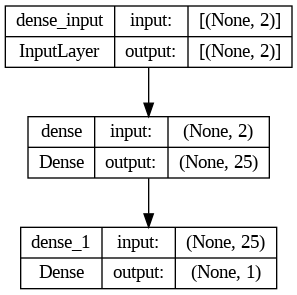

In [2]:

def define_descriminator(n_inputs=2):
  model= Sequential()
  model.add(Dense(25,input_dim=n_inputs,activation='relu',
                  kernel_initializer='he_uniform'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

model = define_descriminator()
model.summary()
plot_model(model,
           to_file ='discriminator_plot.png',
           show_shapes=True,show_layer_names=True)

In [3]:
def generate_real_samples(n):
  X1 = rand(n)-0.5
  X2 = X1*X1
  X1 = X1.reshape(n,1)
  X2 = X2.reshape(n,1)
  X = np.hstack((X1,X2))
  y = np.ones((n,1))
  return X,y

# def generate_fake_samples(n):
#   X1 = -1 + rand(n)*2
#   X2 = -1 + rand(n)*2
#   X1 = X1.reshape(n,1)
#   X2 = X2.reshape(n,1)
#   X = np.hstack((X1,X2))
#   y = np.zeros((n,1))
#   return X,y,

def generate_fake_samples(genrator,latent_sdim,n):
  x_input = generate_latent_points(latent_dim,n)
  X = generator.predict(x_input)
  y =np.zeros((n,1))
  return X,y

def generate_latent_points(latent_dim,n):
  x_input= randn(latent_dim*n)
  x_input= x_input.reshape(n,latent_dim)
  return x_input

# 15 dense layers 2 output layers
def define_generator(latent_dim,n_outputs=2):
  model= Sequential()
  model.add(Dense(15,activation="relu", kernel_initializer="he_uniform",
                  input_dim=latent_dim))
  model.add(Dense(n_outputs))
  return model

def define_gan(generator,dicriminator):
  model=Sequential()
  model.add(generator)
  model.add(discriminator)
  model.compile(loss='binary_crossentropy',optimizer='adam')
  return model

def summarize_performance(epoch, generator,discriminator, latent_dim, n_samples=100):
  x_real, y_real = generate_real_samples(n_samples)
  _,acc_real = discriminator.evaluate(x_real,y_real)
  x_fake, y_fake = generate_fake_samples(generator, latent_dim, n_samples)
  _,acc_fake = discriminator.evaluate(x_fake,y_fake)
  print(epoch,acc_real,acc_fake)
  plt.scatter(x_real[:,0],x_real[:,1],color='red')
  plt.scatter(x_fake[:,0],x_fake[:,1],color='blue')
  filename = 'generated_plot_e%03d.png' % (epoch+1)
  plt.savefig(filename)
  plt.close()

def train(g_model,d_model, gan_model, latent_dim,n_epochs=10000, n_batch=128, n_eval =2000):
  half_batch = int(n_batch/2)
  for i in range(n_epochs):
    x_real, y_real = generate_real_samples(half_batch)
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    d_model.train_on_batch(x_real, y_real)
    d_model.train_on_batch(x_fake, y_fake)
    x_gan = generate_latent_points(latent_dim, n_batch)
    y_gan = np.ones((n_batch, 1))
    gan_model.train_on_batch(x_gan, y_gan)
    if (i+1) % n_eval == 0:
      summarize_performance(i, g_model, d_model, latent_dim)

In [4]:
def train_discriminator(model,n_epochs=100,n_batch=128):
  half_batch = int(n_batch/2)
  for i in range(n_epochs):
    # train discriminator on real samples
    X_real,y_real = generate_real_samples(half_batch)
    model.train_on_batch(X_real,y_real)

    # train discriminator on fake samples
    X_fake, y_fake = generate_fake_samples(half_batch)
    model.train_on_batch(X_fake, y_fake)

    #evaluate the model
    _,acc_real = model.evaluate(X_real,y_real,verbose=0)
    _,acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
    print(i,acc_real, acc_fake)

#Now we define the `Generator`

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


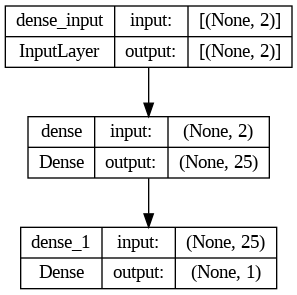

In [5]:
gen_model = define_generator(5)
model.summary()
plot_model(model, to_file="genrator_model.png", show_shapes=True, show_layer_names=True)

In [6]:
latent_dim=5
discriminator = define_descriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator,discriminator)
train(generator, discriminator,gan_model,latent_dim)

2/2 [==============================] - 0s 6ms/step


KeyboardInterrupt: 

#Working with MNIST Hand Written Digits data

In [7]:
from  tensorflow.keras.datasets.mnist import load_data
(trainX,trainY), (testX,testY) = load_data()

In [1]:
def load_real_samples():
  (trainX,_), (_,_) = load_data()
  X=tf.expand_dims(trainX,axis=-1)
  X=trainX.astype('float32')
  X=trainX/255.0
  return X

def generate_real_samples(dataset,n_samples):
  index = np.random.randint(0, dataset.shape[0], n_samples)
  X = dataset[index]
  y = np.ones((n_samples,1))
  return X,y


# def generate_fake_samples(n_samples):
#   x_input = randn(n_samples*28*28)
#   x_input = x_input.reshape(n_samples,28,28,1)
#   y = np.zeros((n_samples,1))
#   return x_input,y

def define_discriminator(in_shape=(28,28,1)):
  model = Sequential()
  model.add(Conv2D(64,(3,3),strides=2, padding='same', input_shape =in_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(64,(3,3),strides=2,padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(1,'sigmoid'))
  opt = tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5)
  model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
  return model

def define_generator(latent_dim):
  n_nodes = 128*7*7
  model = Sequential()
  model.add(Dense(n_nodes,input_dim=latent_dim))# why latent dim
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((7,7,128)))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(1,(7,7),activation='sigmoid',padding='same'))
  return model

def generate_latent_points(latent_dim,n_samples):
  x_input = randn(latent_dim,n_samples)
  x_input= x_input.reshape((n_samples,latent_dim))

  return x_input

def generate_fake_samples(generator,latent_samples,n_samples):
  x_input = generate_latent_points(latent_dim,n_samples)
  X = generator.predict(x_input)
  y = np.zeros((n_samples,1))
  return X,y

def gan_model(g_model,d_model):
  d_model.trainable = False
  model = Sequential()
  model.add(g_model)
  model.add(d_model)
  opt= tf.keras.optimizers.Adam(learning_rate=0.0002,beta_1=0.5)
  model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])
  return model
def train(d_model,g_model,gan_model,latent_dim,n_epochs=20,n_batch=128):
  half_batch = int(n_batch/2)
  for i in rane(n_epochs):
    for j in range(n_batch):
      X_real,y_real = generate_real_samples(half_batch)
      x_fake,y_fake= generate_fake_samples(g_model,latent_dim,half_batch)
      X,y=vstack((X_real,y_real)),vstack((X_fake,y_fake))
      d_loss= d_model.train_on_batch()



def train_discriminator(model,dataset,n_epochs=100,n_batch=128):
  half_batch = int(n_batch/2)
  for i in range(n_epochs):
    X_real,y_real = generate_real_samples(dataset,half_batch)
    _,acc_real= model.train_on_batch(X_real,y_real)

    X_fake,y_fake=generate_fake_samples(half_batch)
    _,fake_acc= model.train_on_batch(X_fake,y_fake)
    print(f"epoch = {i+1}, real_acc = {acc_real*100}, fake_acc = {fake_acc*100}")


1/1 [==============================] - 0s 220ms/step


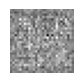

In [9]:
latent_dim = 100
g_model = define_generator(latent_dim)
n_samples=25
X,_ = generate_fake_samples(g_model, latent_dim, n_samples)
for i in range(n_samples):
  plt.subplot(5,5,1+1)
  plt.axis('off')
  plt.imshow(X[i, :, :,0],cmap='gray_r')
plt.show()

In [10]:
X.shape

(25, 28, 28, 1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 14, 14, 128)       262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 28, 28, 128)       262272    
 Transpose)                                           

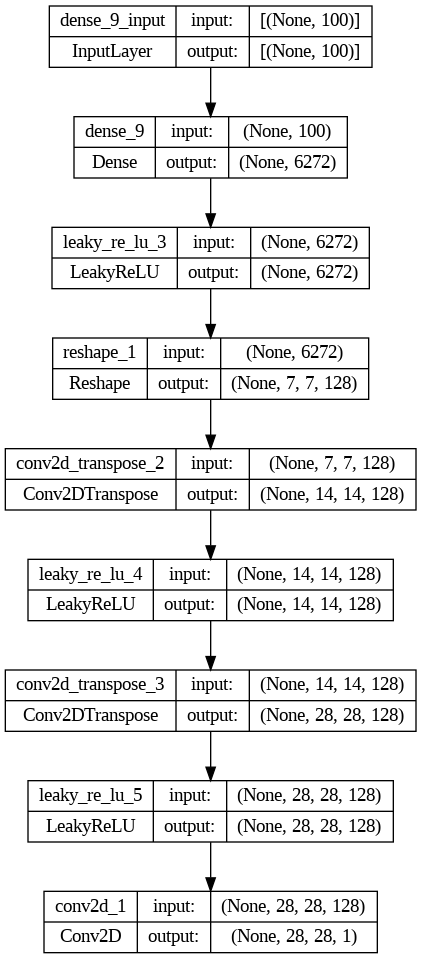

In [13]:
print(g_model.summary())
plot_model(g_model,show_layer_names=True,show_shapes=True,to_file='d_model.png')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 14, 14, 128)       262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 28, 28, 128)       262272    
 Transpose)                                           

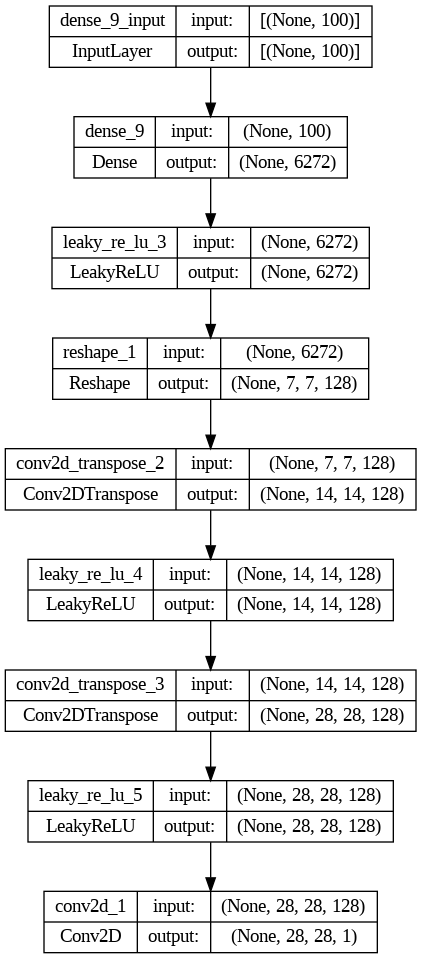

In [12]:
latent_dim=100
g_model = define_generator(latent_dim)
print(g_model.summary())
plot_model(g_model,show_layer_names=True,show_shapes=True, to_file='g_model.png')